In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14,6)


In [3]:
df = pd.read_csv("../data/sales_data.csv", parse_dates=['Date'])

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.shape

(113036, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
# what is the mean of the customers age?
df.Customer_Age.mean()

35.91921157861212

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

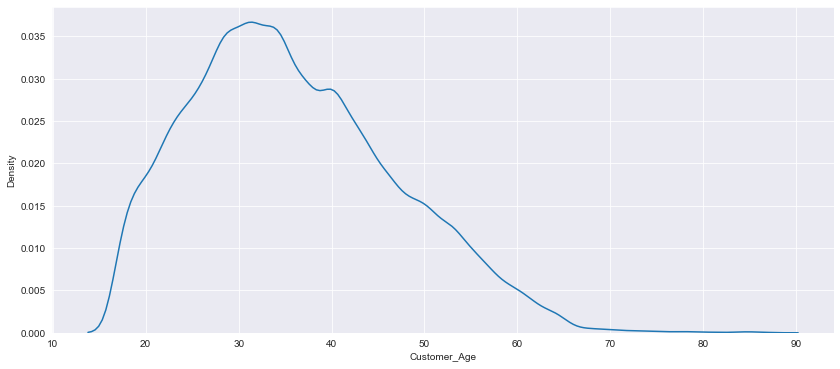

In [10]:
sns.kdeplot(df.Customer_Age)

<AxesSubplot:xlabel='Customer_Age'>

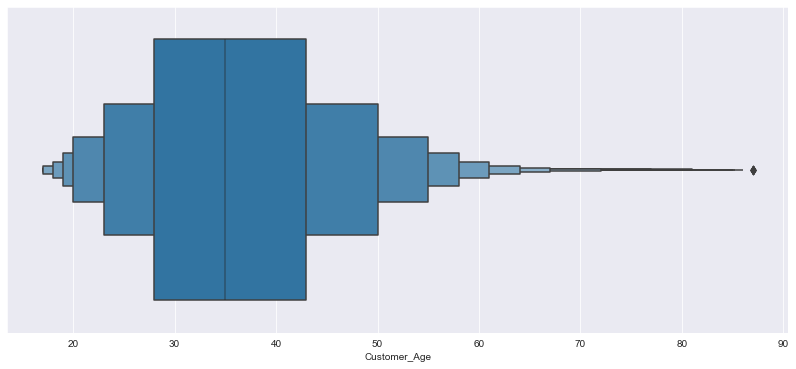

In [12]:
sns.boxenplot(x=df.Customer_Age)

In [13]:
df.Order_Quantity.mean()

11.901659648253654

<AxesSubplot:xlabel='Order_Quantity', ylabel='Count'>

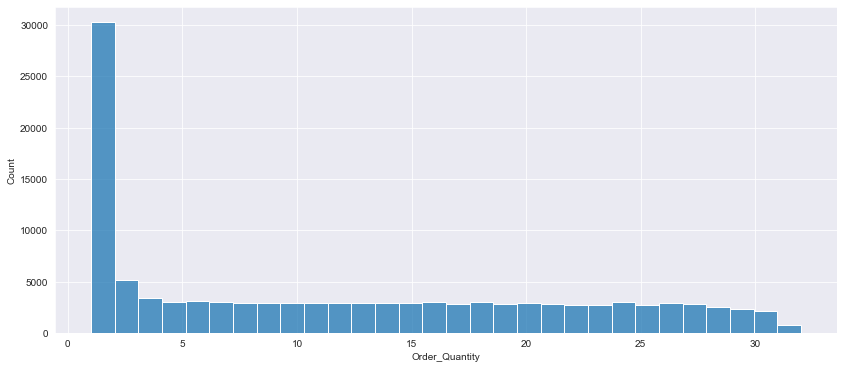

In [15]:
sns.histplot(df.Order_Quantity, bins=30)

<AxesSubplot:xlabel='Order_Quantity'>

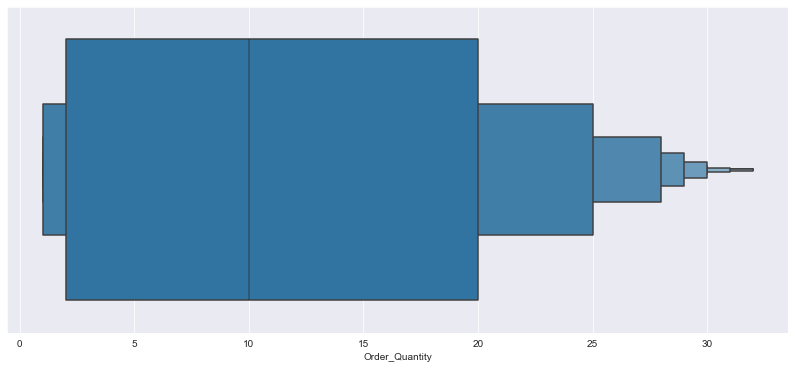

In [20]:
sns.boxenplot(x=df.Order_Quantity)

In [21]:
# how many sales per year are there?
df.Year.value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

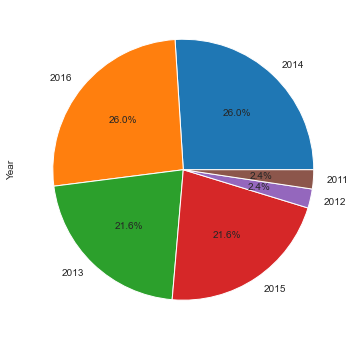

In [22]:
df.Year.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [23]:
# how many sales per month are there?
df.Month.value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:ylabel='Month'>

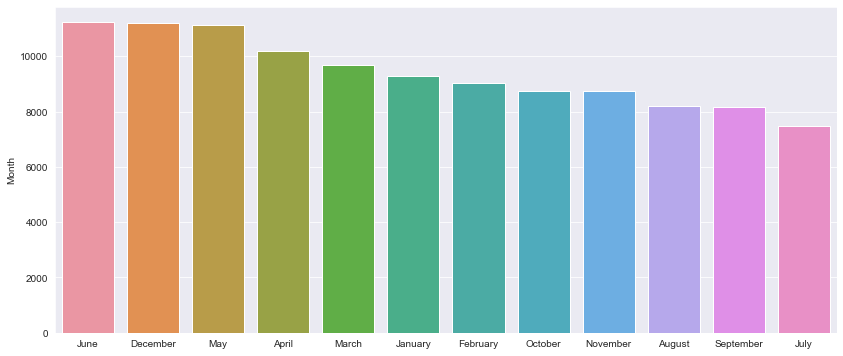

In [32]:
sns.barplot(x=df.Month.value_counts().index, y=df.Month.value_counts())

<AxesSubplot:>

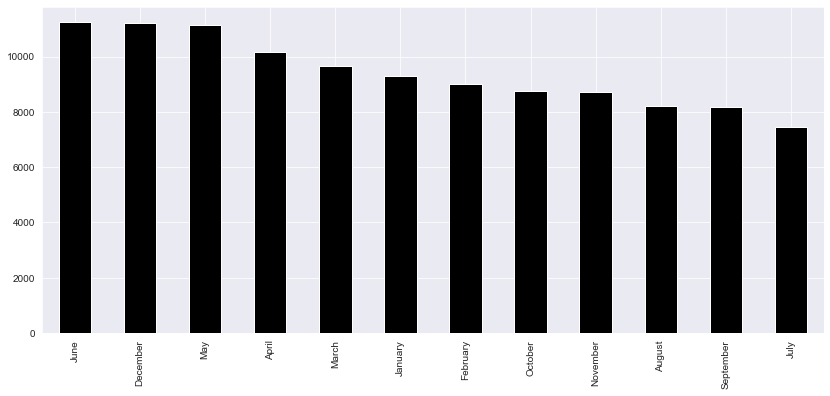

In [30]:
df.Month.value_counts().plot(kind='bar', color='black')

In [33]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [34]:
df.Country.value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [35]:
# which country has the most sales?
df.Country.value_counts().idxmax()

'United States'

<AxesSubplot:ylabel='Country'>

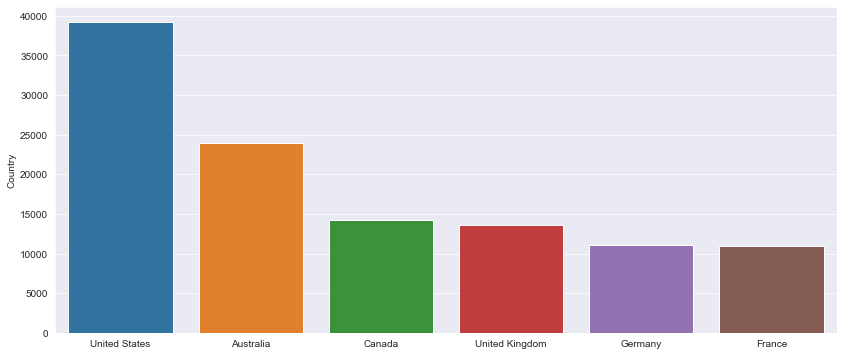

In [36]:
sns.barplot(x=df.Country.value_counts().index, y=df.Country.value_counts())

<AxesSubplot:>

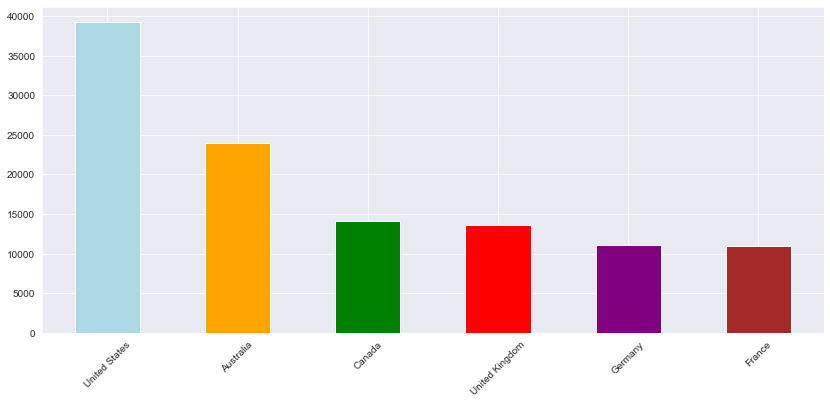

In [42]:
colors = ['lightblue', 'orange', 'green', 'red', 'purple', 'brown']
df.Country.value_counts().plot(kind='bar', color=colors, rot=45)

In [43]:
# create a list of every product sold
df.Product.unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

[Text(0, 0, 'Water Bottle - 30 oz.'),
 Text(1, 0, 'Patch Kit/8 Patches'),
 Text(2, 0, 'Mountain Tire Tube'),
 Text(3, 0, 'AWC Logo Cap'),
 Text(4, 0, 'Sport-100 Helmet, Red'),
 Text(5, 0, 'Road Tire Tube'),
 Text(6, 0, 'Sport-100 Helmet, Black'),
 Text(7, 0, 'Fender Set - Mountain'),
 Text(8, 0, 'Sport-100 Helmet, Blue'),
 Text(9, 0, 'Touring Tire Tube')]

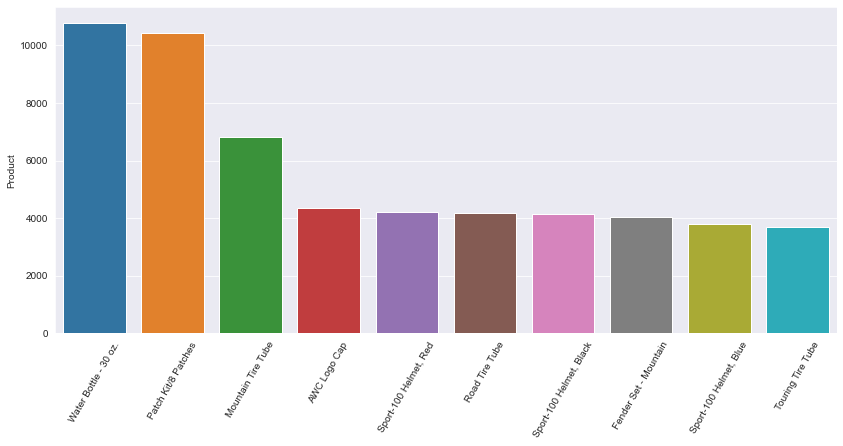

In [52]:
ax = sns.barplot(x=df.Product.value_counts().head(10).index, y=df.Product.value_counts().head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

<AxesSubplot:>

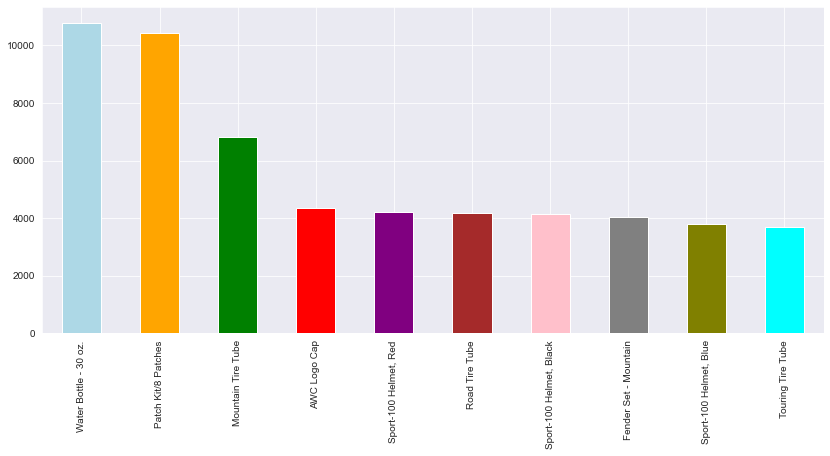

In [55]:
colors = ['lightblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
df.Product.value_counts().head(10).plot(kind='bar', color=colors, rot=90)

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

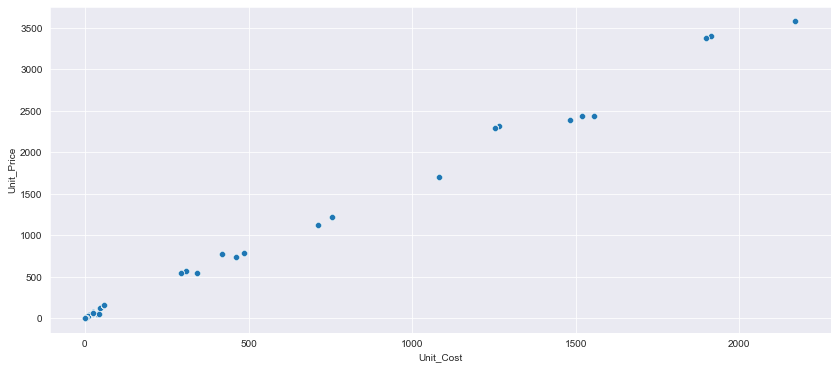

In [56]:
# what is the relationship between unit cost and unit price?
sns.scatterplot(x=df.Unit_Cost, y=df.Unit_Price)

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

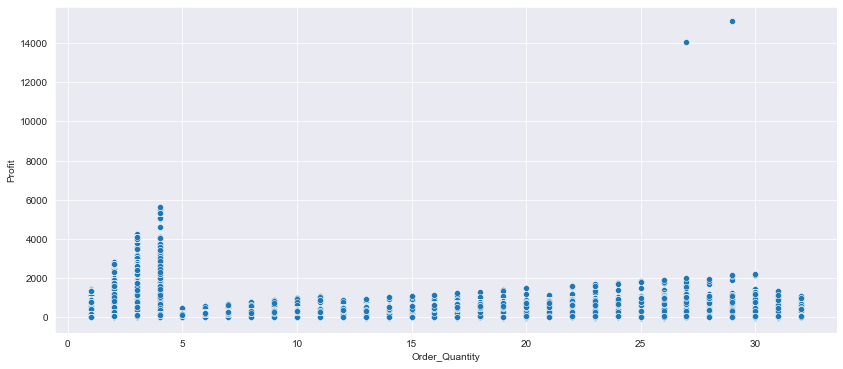

In [57]:
# order quantity and profit?
sns.scatterplot(x=df.Order_Quantity, y=df.Profit)

In [58]:
# relationship between profit per country?
df[['Profit', 'Country']].groupby('Country').sum()

,Profit
Country,
Australia,6776030
Canada,3717296
France,2880282
Germany,3359995
United Kingdom,4413853
United States,11073644


<AxesSubplot:xlabel='Profit', ylabel='Country'>

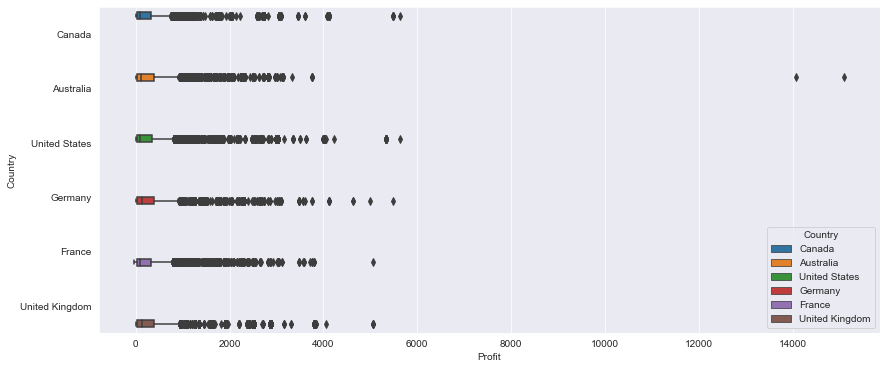

In [68]:
sns.boxplot(x=df.Profit, y=df.Country, hue=df.Country)

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

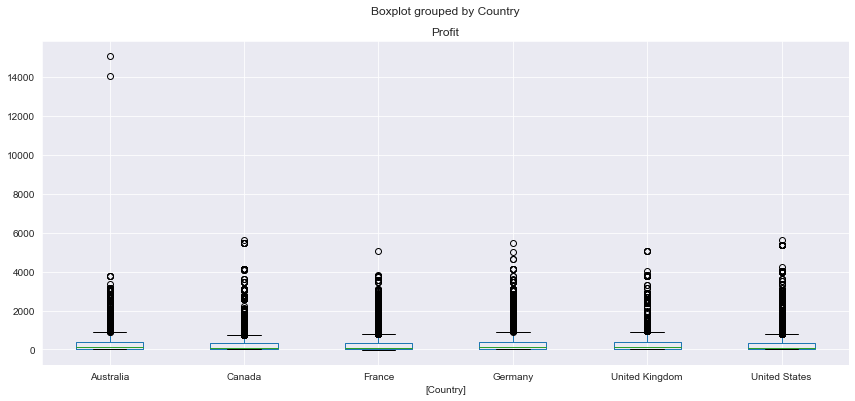

In [60]:
df[['Profit', 'Country']].boxplot(by='Country')

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

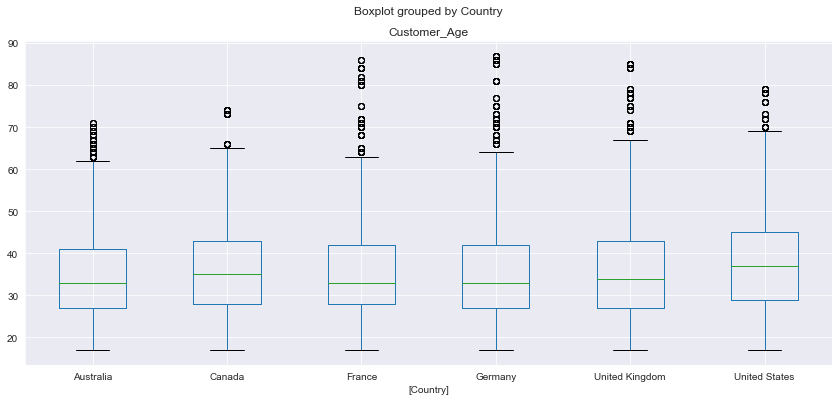

In [64]:
# relationship between customer age per country
df[['Customer_Age', 'Country']].boxplot(by='Country')

<AxesSubplot:xlabel='Customer_Age', ylabel='Country'>

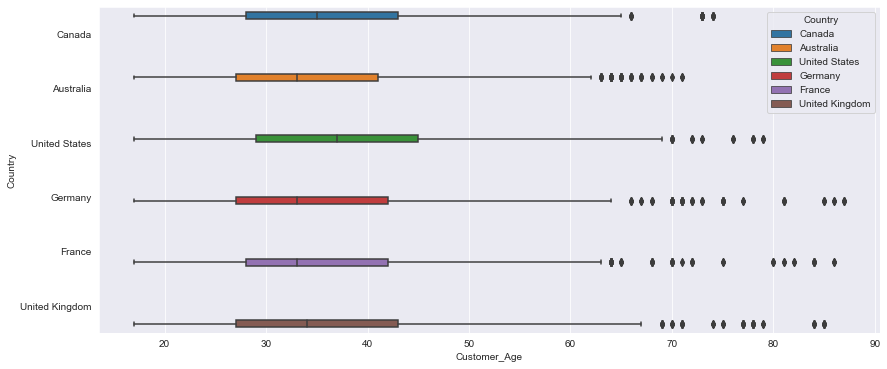

In [66]:
sns.boxplot(x=df.Customer_Age, y=df.Country, hue=df.Country)

In [69]:
#  add and calculate a new calculated date column
df['Date_Calculated'] = df.Date.dt.strftime('%Y-%m-%d')

In [70]:
df.Date_Calculated.head()

0    2013-11-26
1    2015-11-26
2    2014-03-23
3    2016-03-23
4    2014-05-15
Name: Date_Calculated, dtype: object

In [71]:
df.Date_Calculated = pd.to_datetime(df.Date_Calculated)
df.Date_Calculated.head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Date_Calculated, dtype: datetime64[ns]

In [72]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Date_Calculated
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-05-15


In [73]:
df.drop(['Date_Calculated'], axis=1, inplace=True)

In [74]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [75]:
df['Calculated_Date'] = df[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

In [76]:
df.Calculated_Date.head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [77]:
df.Calculated_Date = pd.to_datetime(df.Calculated_Date)
df.Calculated_Date.head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

In [78]:
# how did sales evolve through the years?
df.groupby('Calculated_Date').sum()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Calculated_Date,,,,,,,,,
2011-01-01,5,10055,154,8,5999,9976,3225,9596,12821
2011-01-02,8,8044,148,9,3694,5803,2925,8943,11868
2011-01-03,24,16088,313,17,7700,13253,12174,19001,31175
2011-01-04,20,10055,174,10,6794,11354,6240,12669,18909
2011-01-05,15,6033,115,5,2057,3267,1644,3031,4675
...,...,...,...,...,...,...,...,...,...
2016-07-27,1593,118944,2128,807,534,1243,7253,6841,14094
2016-07-28,2296,165312,3057,1332,655,1399,9285,9817,19102
2016-07-29,1769,122976,2146,895,707,1469,9820,9509,19329


In [79]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Calculated_Date'],
      dtype='object')

<AxesSubplot:>

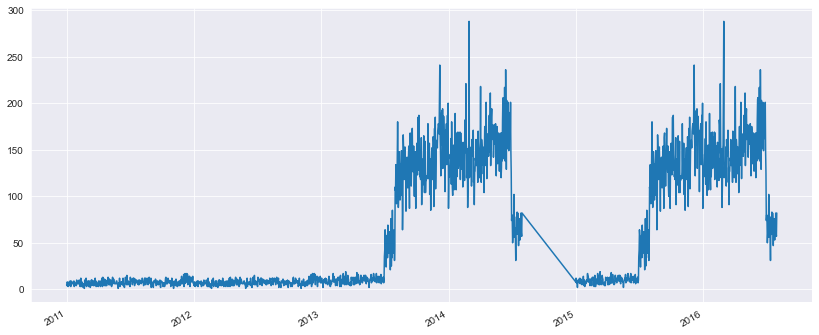

In [82]:
df.Calculated_Date.value_counts().plot(kind='line')

In [87]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Calculated_Date'],
      dtype='object')

In [88]:
# increase $50 revenue to every sale
df.Revenue += 50

In [89]:
df.Revenue

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

In [95]:
# how many orders were made in Canada or France?
df.loc[(df.Country == 'Canada') | (df.Country == 'France')].shape[0]

25176

In [96]:
# US or Australia
df.loc[(df.Country == 'United States') | (df.Country == 'Australia')].shape[0]

63142

In [100]:
df.Sub_Category.unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [97]:
# how many bike rack orders were made from the US?
df.loc[(df.Country == 'United States') & (df.Sub_Category == 'Bike Racks')].shape[0]

242

In [99]:
# how many vests were ordered from Canada?
df.loc[(df.Country == 'Canada') & (df.Sub_Category == 'Vests')].shape[0]

144

In [105]:
# how many mountain bikes were ordered from the Australia?
df.loc[(df.Country == 'Australia') & (df.Sub_Category == 'Mountain Bikes')].shape[0]

2156

In [107]:
# how many touring bikes were ordered from the US?
df.loc[(df.Country == 'United States') & (df.Sub_Category == 'Touring Bikes') | (df.Sub_Category == 'Road Bikes')].shape[0]

14568

In [108]:
df[df.Country == 'Canada'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,644,2013-08-02
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,517,315,882,2015-08-02
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,288,2013-09-02


In [111]:
# how many orders were made in each province of Canada?
canadian_orders = df.loc[df.Country == 'Canada', 'State'].value_counts()
print(canadian_orders)

British Columbia    14116
Alberta                56
Ontario                 6
Name: State, dtype: int64


<AxesSubplot:ylabel='State'>

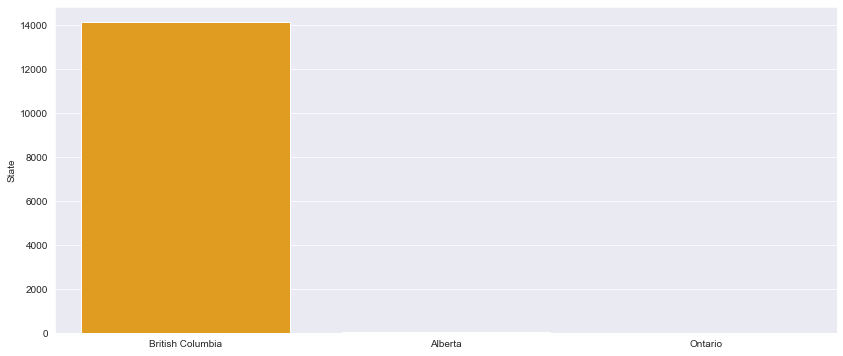

In [115]:
sns.barplot(x=canadian_orders.index, y=canadian_orders, color='orange')

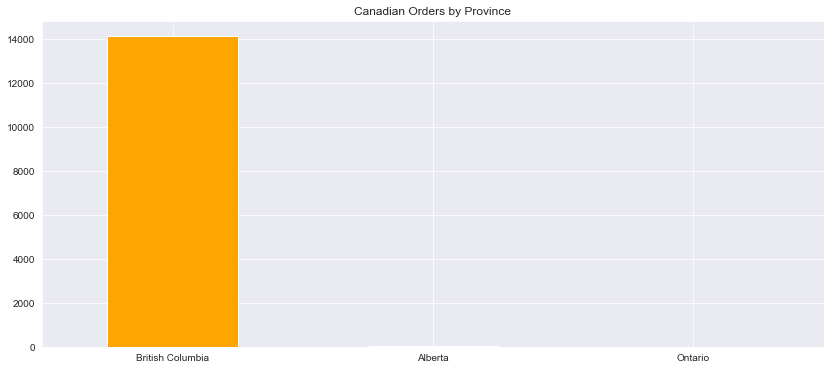

In [119]:
canadian_orders.plot(kind='bar', color='orange', rot=0, title='Canadian Orders by Province')

In [121]:
# how many sales were made per category?
df.groupby('Product_Category').sum()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Product_Category,,,,,,,,,
Accessories,1099436,141261750,2530226,1054162,443530,1185400,8862377,6255615,18623992
Bikes,407346,52323571,918418,36411,29400230,49395368,20519276,41262858,63081234
Clothing,264012,34114594,611520,254743,370352,617580,2839447,5531435,9217582


In [122]:
df.Product_Category.value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:>

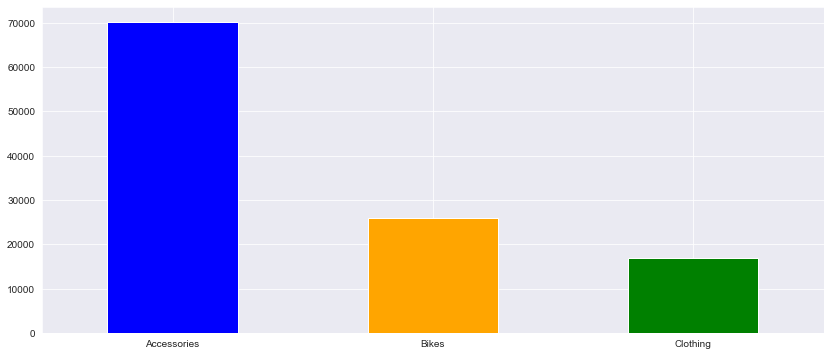

In [126]:
colors = ['blue', 'orange', 'green']
df.Product_Category.value_counts().plot(kind='bar', color=colors, rot=0)

<AxesSubplot:ylabel='Product_Category'>

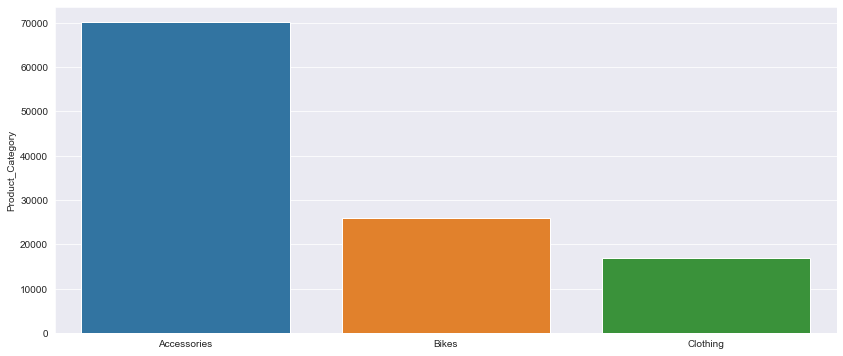

In [124]:
sns.barplot(x=df.Product_Category.value_counts().index, y=df.Product_Category.value_counts())

In [127]:
# how many sales were made per sub category?
df.groupby('Sub_Category').sum()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Sub_Category,,,,,,,,,
Bike Racks,9598,1192606,22326,4741,26640,71040,304455,213345,547400
Bike Stands,7238,918602,16700,2412,26848,72348,201935,142140,366875
Bottles and Cages,244942,31983594,570634,241726,39280,102160,810598,598576,2202974
Caps,68026,8779600,154080,67268,30496,39214,77921,470856,766677
Cleaners,28554,3630264,65560,27574,5414,14418,115891,82930,288921
Fenders,62840,8122714,148230,62138,32236,88648,748914,496819,1447333
Gloves,42648,5411128,97310,39978,24170,64456,511654,359765,1005719
Helmets,191754,24493078,441472,181606,158054,425530,3380203,2360878,6348981
Hydration Packs,20924,2687400,49222,19914,27998,73330,572668,417738,1057106


In [128]:
df.Sub_Category.value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<AxesSubplot:>

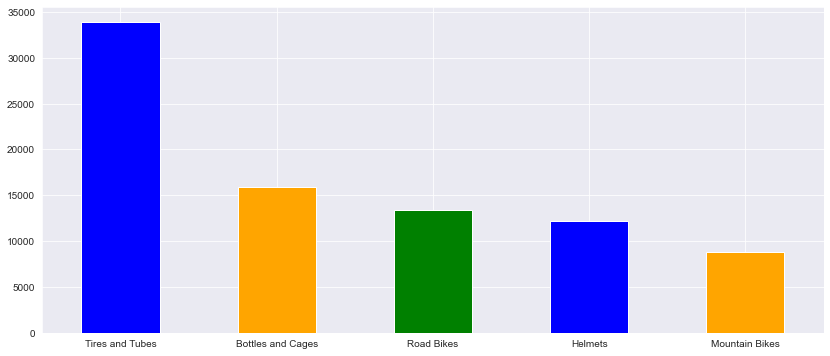

In [131]:
# what are the top 5 most popular products?
df.Sub_Category.value_counts().head().plot(kind='bar', color=colors, rot=0)

<AxesSubplot:ylabel='Sub_Category'>

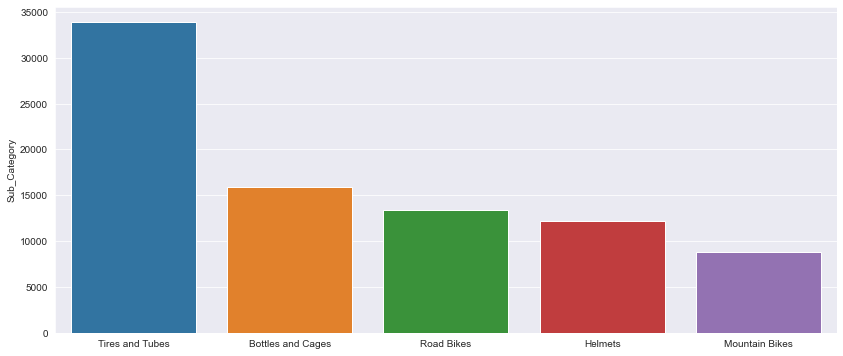

In [132]:
sns.barplot(x=df.Sub_Category.value_counts().head(5).index, y=df.Sub_Category.value_counts().head(5))

In [137]:
# how many orders were made per accessory sub-categories?
accessories = df.loc[df.Product_Category == 'Accessories', 'Sub_Category'].value_counts()
print(accessories)

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64


<AxesSubplot:>

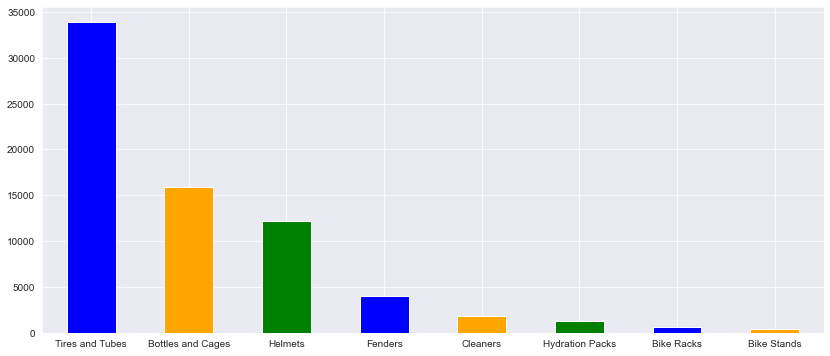

In [139]:
accessories.plot(kind='bar', color=colors, rot=0)

<AxesSubplot:ylabel='Sub_Category'>

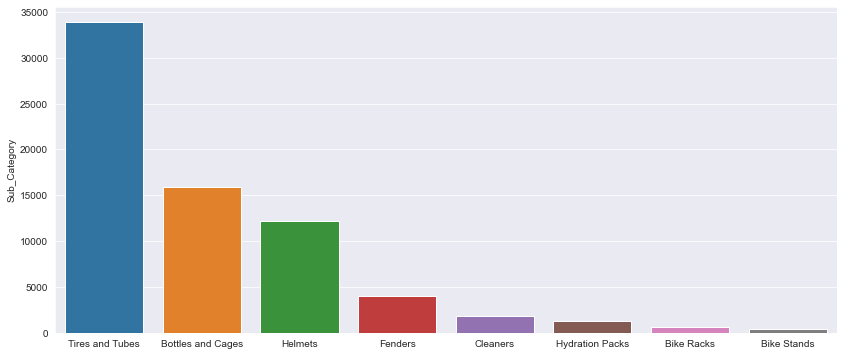

In [141]:
sns.barplot(x=accessories.index, y=accessories)

In [143]:
# how many orders were made per clothing sub-categories?
clothing = df.loc[df.Product_Category == 'Clothing', 'Sub_Category'].value_counts()
print(clothing)

Jerseys    6010
Caps       4358
Gloves     2686
Shorts     1794
Socks      1122
Vests       964
Name: Sub_Category, dtype: int64


<AxesSubplot:>

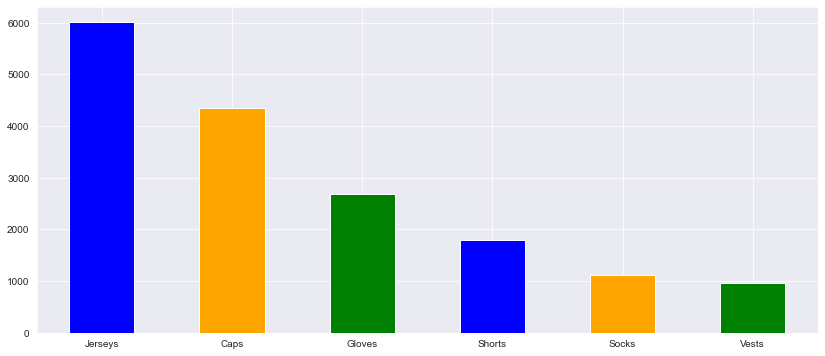

In [144]:
clothing.plot(kind='bar', color=colors, rot=0)

<AxesSubplot:ylabel='Sub_Category'>

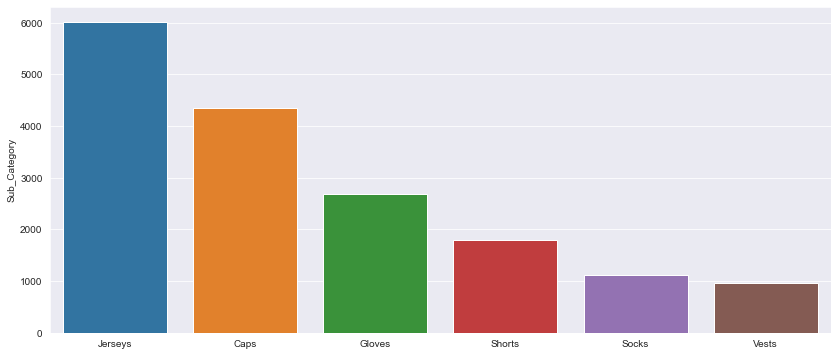

In [145]:
sns.barplot(x=clothing.index, y=clothing)

<AxesSubplot:ylabel='Sub_Category'>

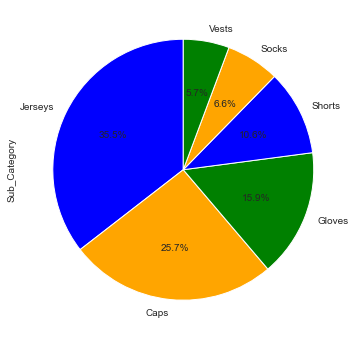

In [146]:
clothing.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=clothing.index, colors=colors)

In [147]:
# now per bike subcategories?
bikes = df.loc[df.Product_Category == 'Bikes', 'Sub_Category'].value_counts()
print(bikes)

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64


Text(0.5, 1.0, 'Bike Sub-Categories')

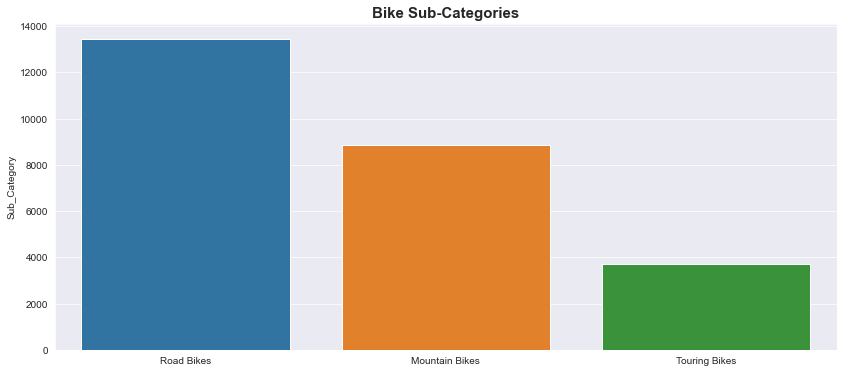

In [152]:
sns.barplot(x=bikes.index, y=bikes)
plt.title('Bike Sub-Categories', fontsize=15, fontweight='bold')

<AxesSubplot:ylabel='Sub_Category'>

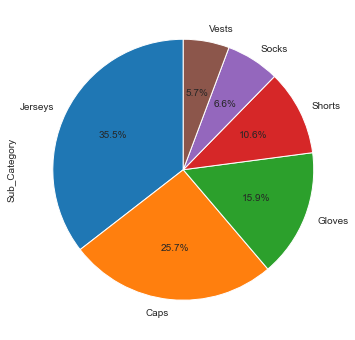

In [158]:
clothing.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=clothing.index)

In [159]:
# which gender has the most amount of sales?
df.Customer_Gender.value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot:ylabel='Customer_Gender'>

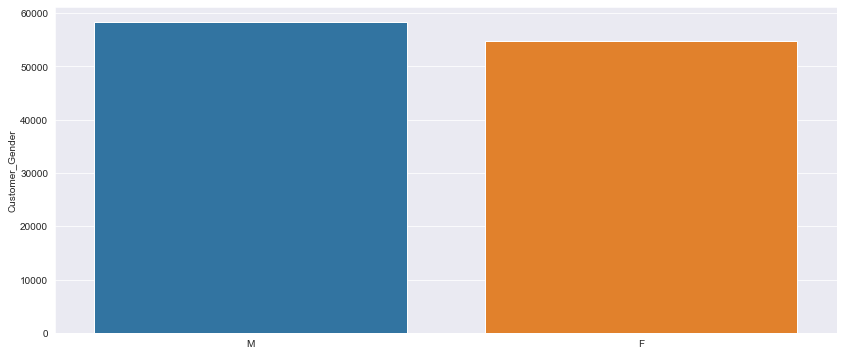

In [162]:
sns.barplot(x=df.Customer_Gender.value_counts().index, y=df.Customer_Gender.value_counts())

<AxesSubplot:title={'center':'Most Amount of Sales by Gender'}>

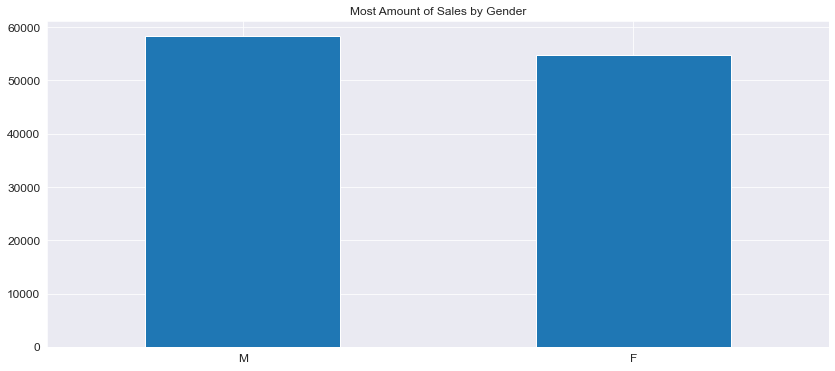

In [167]:
df.Customer_Gender.value_counts().plot(kind='bar', rot=0, title='Most Amount of Sales by Gender', fontsize=12)

In [168]:
# how many sales with more than 500 in revenue were made by men?
df.loc[(df.Customer_Gender == 'M') & (df.Revenue == 500)].shape[0]

50

In [169]:
df.loc[(df.Customer_Gender == 'F') & (df.Revenue == 500)].shape[0]

29

In [170]:
# top 5 sales with the highest revenue
df.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


<AxesSubplot:title={'center':'Top 5 Sales with the Highest Revenue'}>

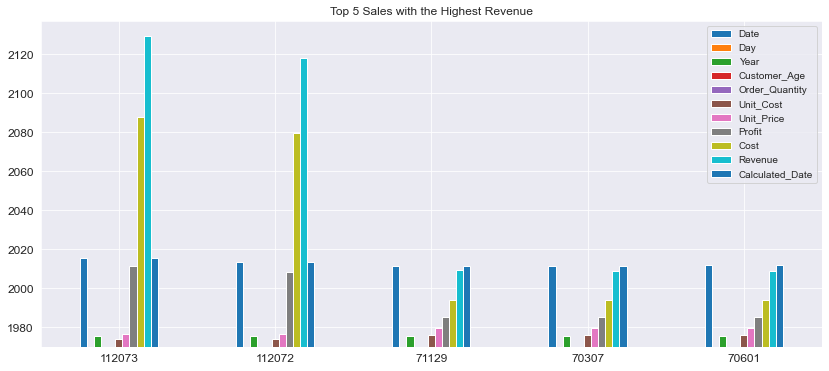

In [171]:
df.sort_values(['Revenue'], ascending=False).head(5).plot(kind='bar', rot=0, title='Top 5 Sales with the Highest Revenue', fontsize=12)

In [172]:
# get the sale with the highest revenue
df.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [173]:
df.Revenue.max()

58124

In [176]:
# what is the order quantity of orders with more than 10k in revenue?
df.loc[df.Revenue > 10_000, 'Order_Quantity'].mean()

3.689265536723164

In [182]:
# what is the mean order quantity of orders with less than 10k in revenue?
df.loc[df.Revenue < 10_000, 'Order_Quantity'].mean()

11.914539380997528

In [184]:
# how many orders were made in May 2016?
df.loc[(df.Year == 2016) & (df.Month == 'May')].shape[0]

5015

In [185]:
# how many orders were made bewtween may and july 2016?
df.loc[(df.Year == 2016) & (df.Month.isin(['May', 'June', 'July']))].shape[0]

12164

In [186]:
# bwtween januray and june 2013?
df.loc[(df.Year == 2013) & df.Month.isin(['January', 'February', 'March', 'April', 'May', 'June'])].shape[0]

1738

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

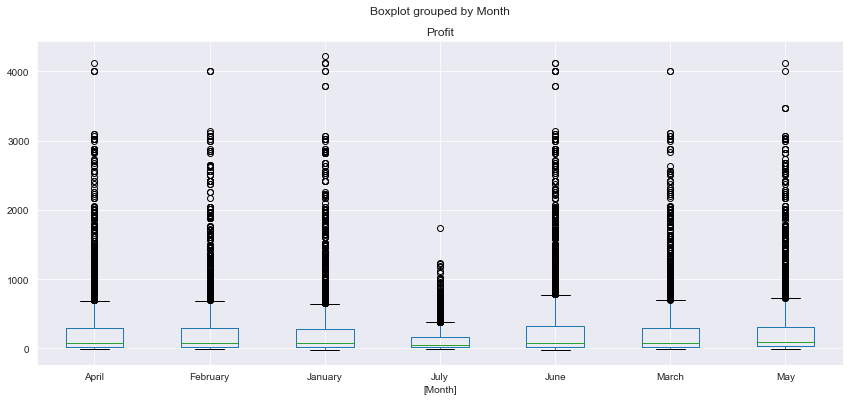

In [188]:
df.loc[df.Year == 2016, ['Profit', 'Month']].boxplot(by='Month')

<AxesSubplot:xlabel='Profit', ylabel='Month'>

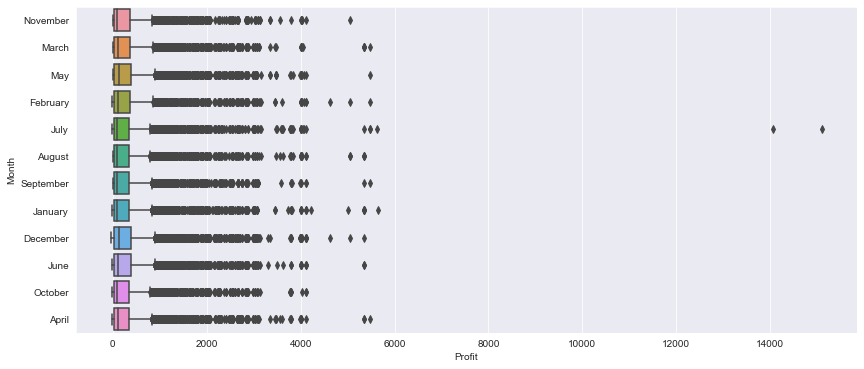

In [190]:
sns.boxplot(x=df.Profit, y=df.Month, data=df.loc[df.Year == 2016])

In [191]:
print('Before the tax increase: ')
df.loc[df.Country == 'Canada', 'Unit_Price']

Before the tax increase: 


0         120
1         120
14        120
15        120
16        120
         ... 
112885     64
112952     64
112953     64
112954     64
112955     64
Name: Unit_Price, Length: 14178, dtype: int64

In [192]:
# add 7.2% tax on every sale unit price within Canada
df.loc[df.Country == 'Canada', 'Unit_Price'] *= 1.072

In [194]:
print('After the tax increase: ')
df.loc[df.Country == 'Canada', 'Unit_Price']

After the tax increase: 


0         128.640
1         128.640
14        128.640
15        128.640
16        128.640
           ...   
112885     68.608
112952     68.608
112953     68.608
112954     68.608
112955     68.608
Name: Unit_Price, Length: 14178, dtype: float64